In [1]:
from vax_concerns_classifiers import MultilabelWeighted, print_report, CATEGORIES
import numpy as np
import pandas as pd
import os
import json

LOCAL_DIR = os.path.join(os.path.dirname(os.getcwd()), 'bert_classifier')
TEST_PATH = os.path.join(LOCAL_DIR, '..', '..', 'data', 'multi_label_test', 'ann.csv')

In [16]:
test_df = pd.read_csv(TEST_PATH)
test_texts = test_df["content"].to_list()
anns = [json.loads(d.replace("'", '"')) for d in test_df['annotations']]
test_labels = np.array([[float(d[cat]) for cat in CATEGORIES] for d in anns])

index = [i for i, tl in enumerate(test_labels) if sum(tl) != 0]
test_texts = [test_texts[i] for i in index]
test_labels = test_labels[index]

weighted = MultilabelWeighted()
weighted.load_model(os.path.join(LOCAL_DIR, 'scripts', 'weighted_log1p'), 'weighted_log1p')

/Users/christopherli/anaconda3/envs/vax_trends/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


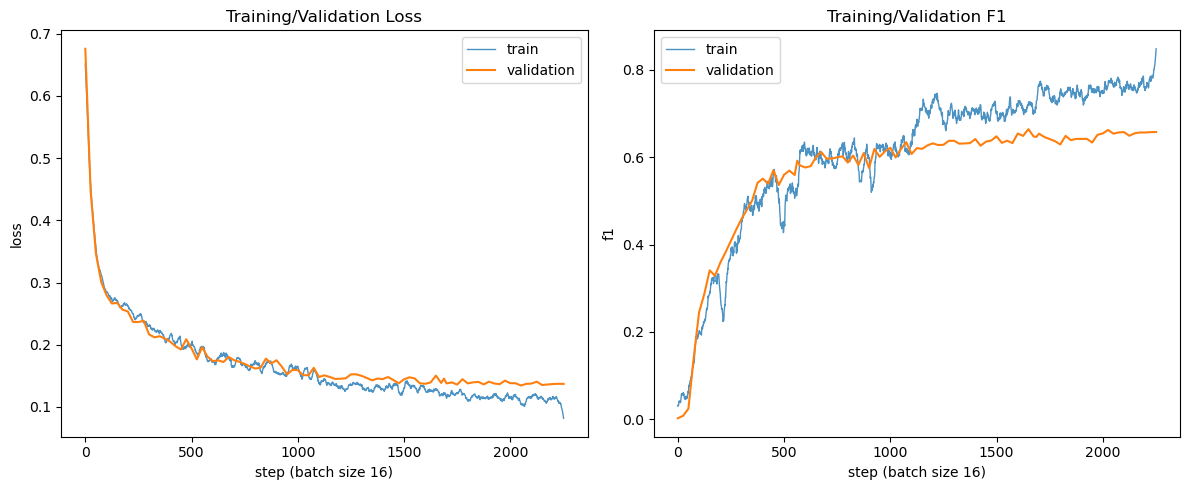

In [3]:
weighted.plot_history(['loss', 'f1'])

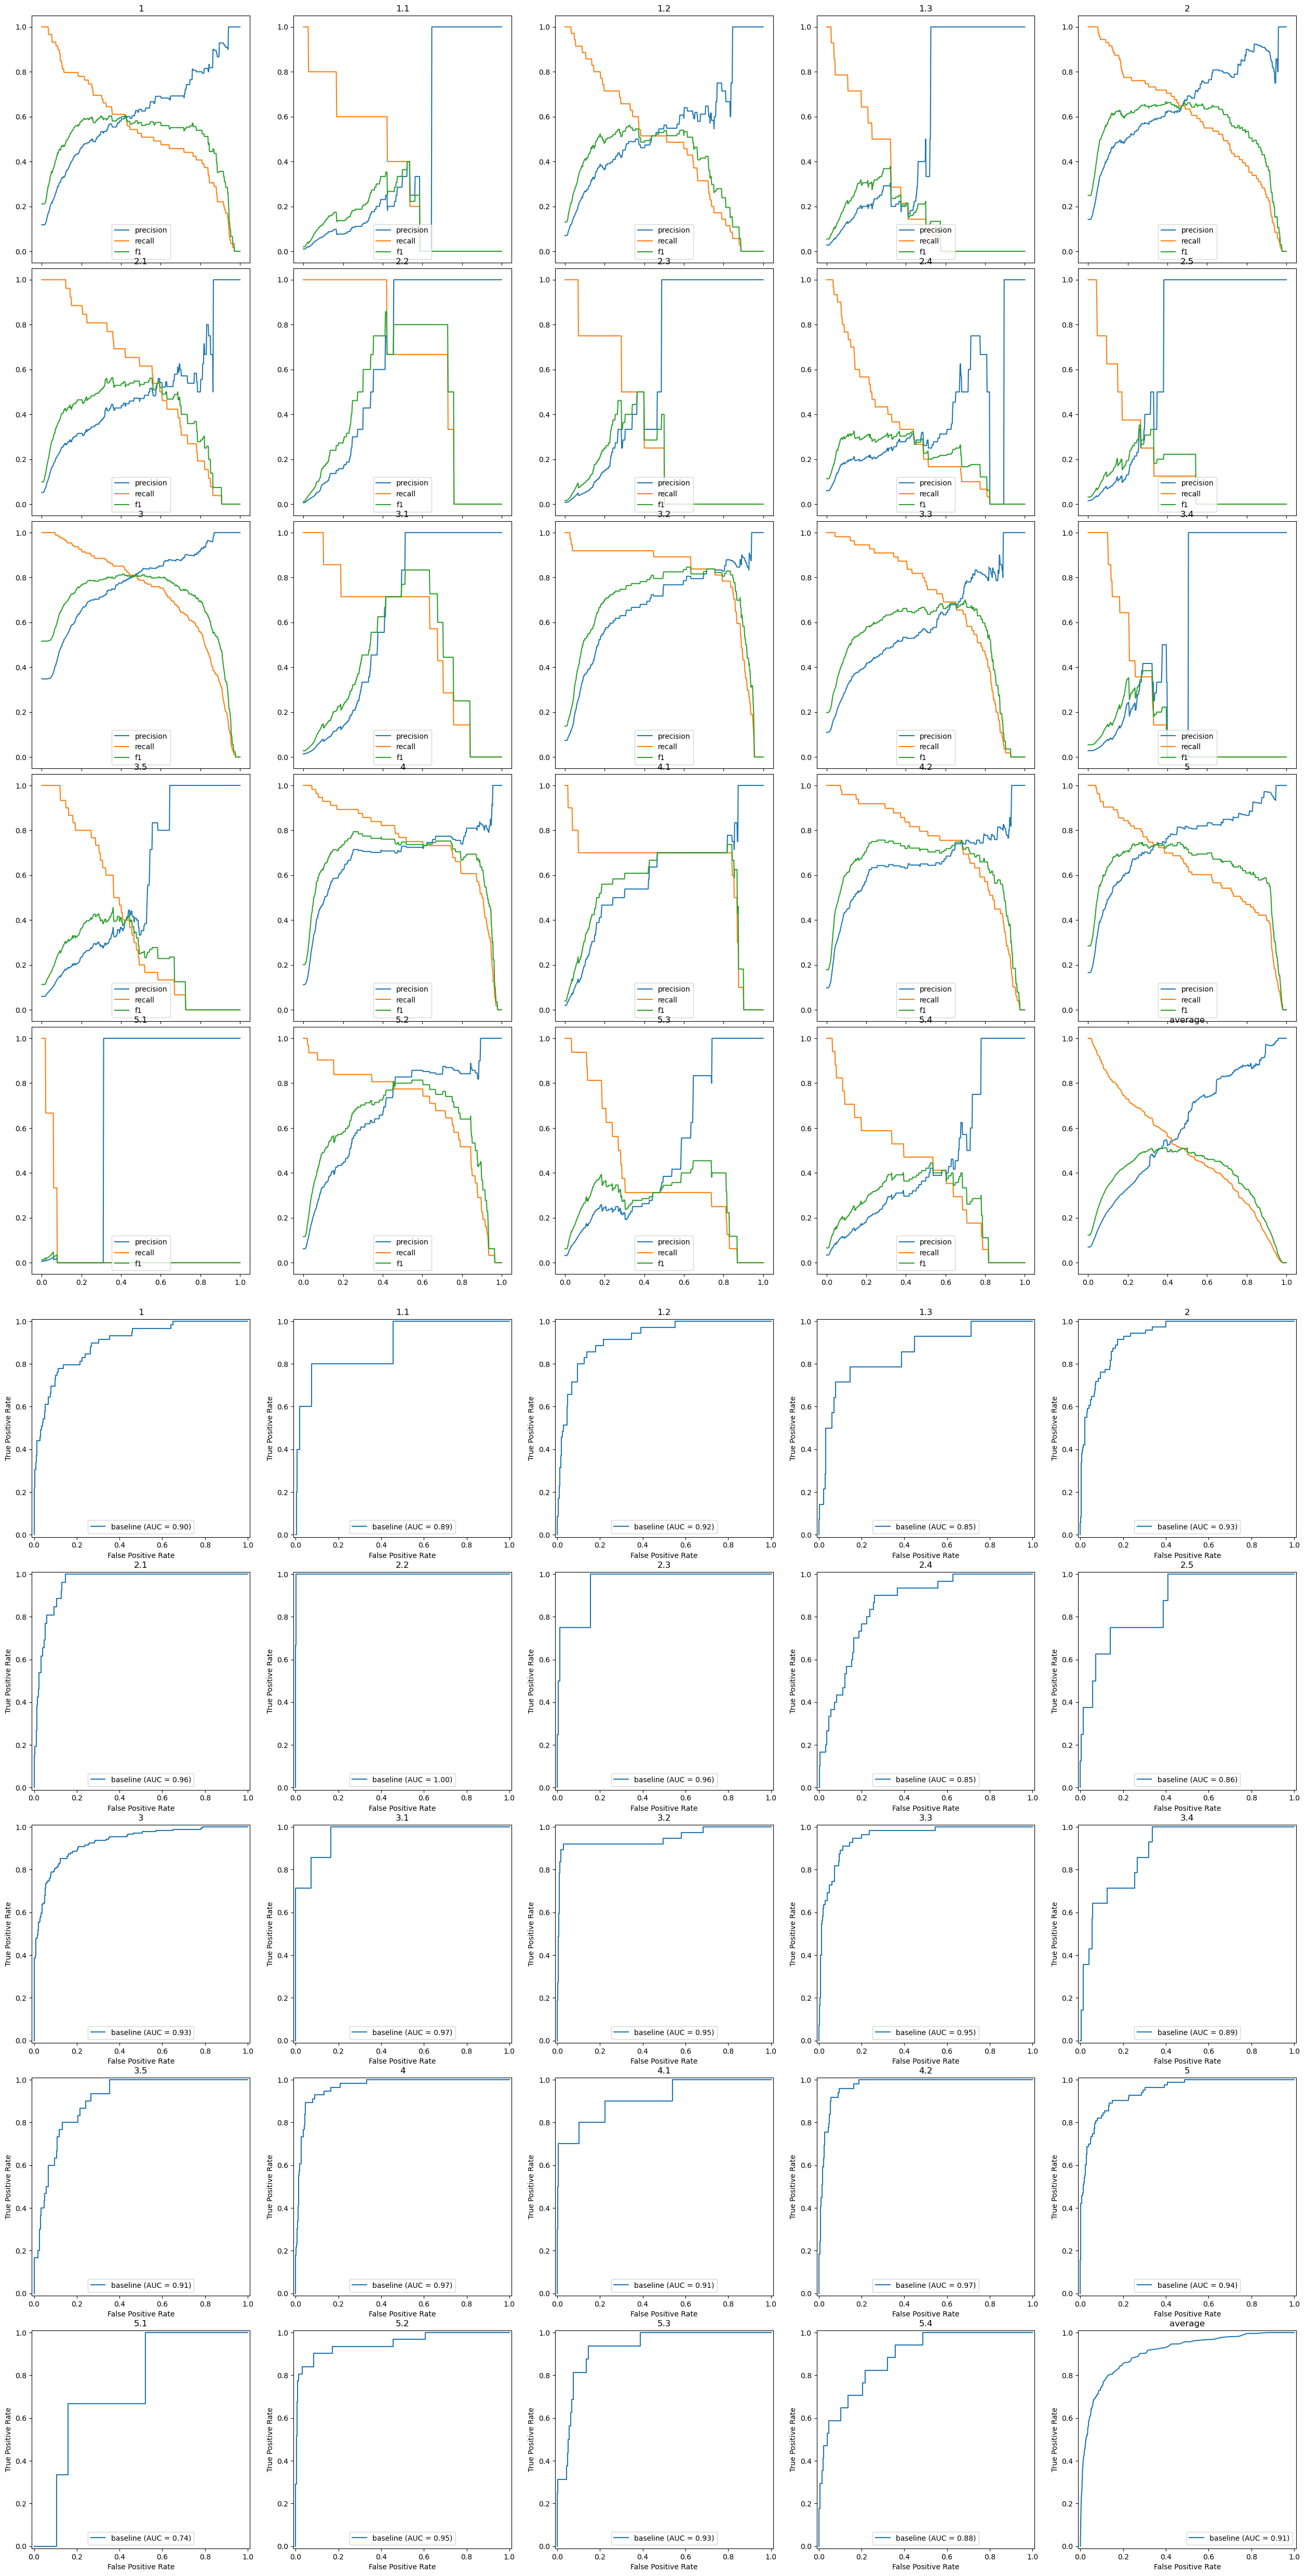

In [4]:
weighted.plot_threshold_analysis(['prf', 'roc'])

In [17]:
predictions = weighted.predict(test_texts)
print_report(test_labels, predictions)

100%|██████████| 6/6 [00:28<00:00,  4.67s/it]

Precision: 84.17721518987342%
Recall: 53.41365461847389%
f1: 65.35626535626535%
              precision    recall  f1-score   support

           0       0.73      0.42      0.53        19
           1       0.00      0.00      0.00         8
           2       0.88      0.58      0.70        12
           3       0.00      0.00      0.00         0
           4       1.00      0.50      0.67        18
           5       0.75      0.23      0.35        13
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       0.50      0.50      0.50         2
          10       0.89      0.72      0.80        47
          11       0.00      0.00      0.00         0
          12       0.82      0.82      0.82        11
          13       0.92      0.32      0.48        34
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
 